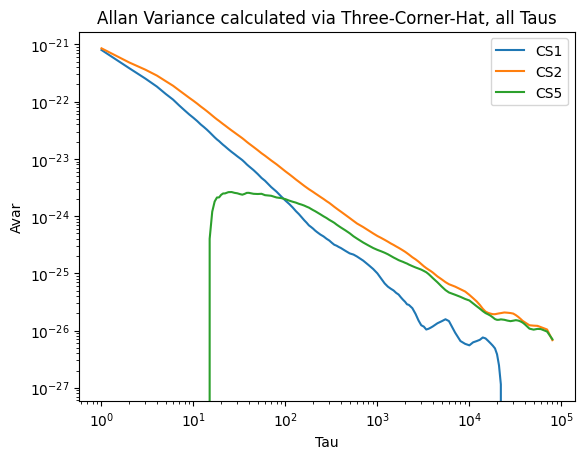

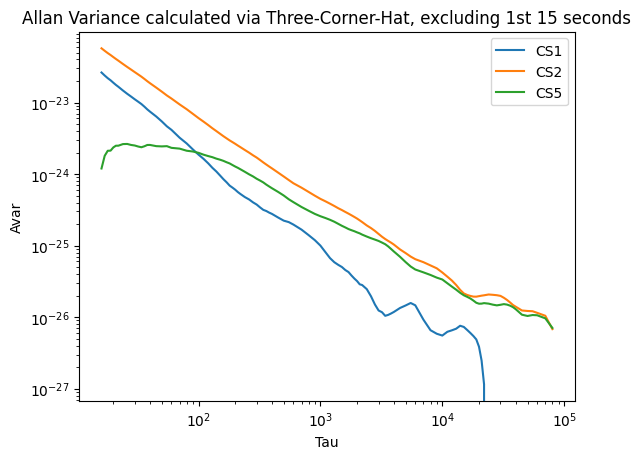

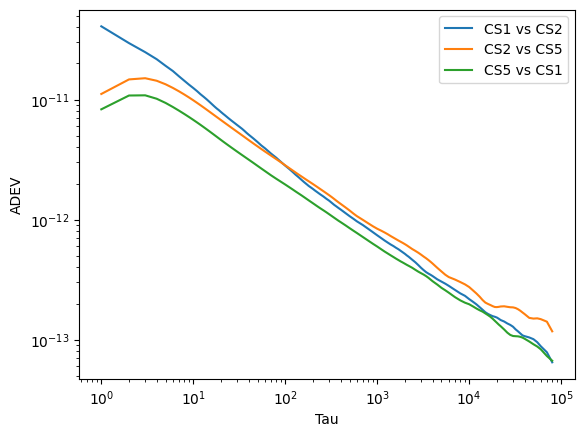

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import csv

#import csv data into numpy arrays

s12_raw = np.genfromtxt('CS2_REF_CS1_InADEV.csv', delimiter = ',')
s15_raw = np.genfromtxt('CS5Ref_CS1inADEV.csv', delimiter = ',')
s25_raw = np.genfromtxt('CS5Ref_CS2inADEV.csv', delimiter = ',')

s25 = s25_raw
s12 = s12_raw[:-2] #removing last 2 colums from data to match length of s25
s15 = s15_raw[:-2] # ^^^^

# initialize arrays for the allan variances

var25 = np.zeros((len(s25),2))
var12 = np.zeros((len(s12),2))
var15 = np.zeros((len(s15),2))
var1 = np.zeros((len(s15),2))
var2 = np.zeros((len(s15),2))
var5 = np.zeros((len(s15),2))

# populate arrays with Tau's and AVARs

for i in range(len(s12)):
  var25[i,0] = s25[i,0]
  var12[i,0] = s12[i,0]
  var15[i,0] = s15[i,0]
  var1[i,0] = s12[i,0]
  var2[i,0] = s12[i,0]
  var5[i,0] = s12[i,0]

# variance = (std.dev)^2

  var25[i,1] = np.square(s25[i,1])
  var12[i,1] = np.square(s12[i,1])
  var15[i,1] = np.square(s15[i,1])



#Three-Corner-Hat calculation

var1[:,1] = (1/2) * (var12[:,1] + var15[:,1] - var25[:,1])
var2[:,1] = (1/2) * (var12[:,1] + var25[:,1] - var15[:,1])
var5[:,1] = (1/2) * (var25[:,1] + var15[:,1] - var12[:,1])



#plot Allan variances

plt.loglog(var1[:,0], var1[:,1], label = 'CS1')
plt.loglog(var2[:,0], var2[:,1], label = 'CS2')
plt.loglog(var5[:,0], var5[:,1], label = 'CS5')
plt.xlabel('Tau')
plt.ylabel('Avar')
plt.title('Allan Variance calculated via Three-Corner-Hat, all Taus')
plt.legend()
plt.show()

plt.loglog(var1[15:,0], var1[15:,1], label = 'CS1')
plt.loglog(var2[15:,0], var2[15:,1], label = 'CS2')
plt.loglog(var5[15:,0], var5[15:,1], label = 'CS5')
plt.xlabel('Tau')
plt.ylabel('Avar')
plt.title('Allan Variance calculated via Three-Corner-Hat, excluding 1st 15 seconds')
plt.legend()
plt.show()

#plot Allan Deviations

plt.loglog(s12[:,0], s12[:,1], label = 'CS1 vs CS2')
plt.loglog(s25[:,0], s25[:,1], label = 'CS2 vs CS5')
plt.loglog(s15[:,0], s15[:,1], label = 'CS5 vs CS1')
plt.xlabel('Tau')
plt.ylabel('ADEV')
plt.legend()
plt.show()

